In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# !pip install librosa

In [53]:
import pandas as pd
import numpy as np
import librosa   #for audio processing
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
import numpy as np
from scipy.io import wavfile #for audio processing
import warnings
warnings.filterwarnings("ignore")

In [49]:
from itertools import cycle
sns.set_theme(style='white', palette=None)
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']
color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])

In [ ]:
# !git clone https://github.com/getalp/ALFFA_PUBLIC.git

Cloning into 'ALFFA_PUBLIC'...
remote: Enumerating objects: 66044, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 66044 (delta 8), reused 1 (delta 0), pack-reused 66024
Receiving objects: 100% (66044/66044), 6.54 GiB | 31.13 MiB/s, done.
Resolving deltas: 100% (12345/12345), done.
Checking out files: 100% (56926/56926), done.


In [ ]:
# !du -sh ALFFA_PUBLIC/

16G	ALFFA_PUBLIC/


In [ ]:
# !du -sh ALFFA_PUBLIC/ASR/*

2.5G	ALFFA_PUBLIC/ASR/AMHARIC
824M	ALFFA_PUBLIC/ASR/FONGBE
11M	ALFFA_PUBLIC/ASR/HAUSA
124K	ALFFA_PUBLIC/ASR/LREC2016_DataCollection_And_ALFFA_Project.pdf
1.5G	ALFFA_PUBLIC/ASR/SWAHILI
2.7G	ALFFA_PUBLIC/ASR/WOLOF


In [ ]:
# !cp -r ALFFA_PUBLIC/ASR/AMHARIC ALFFA_PUBLIC/ASR/SWAHILI drive/MyDrive/speech-data/Swahili

In [ ]:
# !du -sh drive/MyDrive/speech-data/Swahili/SWAHILI/data*

1.3G	drive/MyDrive/speech-data/Swahili/SWAHILI/data


In [40]:
audios = glob('/content/drive/MyDrive/speech-data/Audios/AMHARIC/data/train/*/*.wav')

In [41]:
x, sr = librosa.load(audios[0])

In [47]:
x

array([-0.11535194, -0.13093   , -0.11132754, ..., -0.13838086,
       -0.12441102,  0.        ], dtype=float32)

In [43]:
sr

22050

In [50]:
ipd.Audio(x,rate=sr)

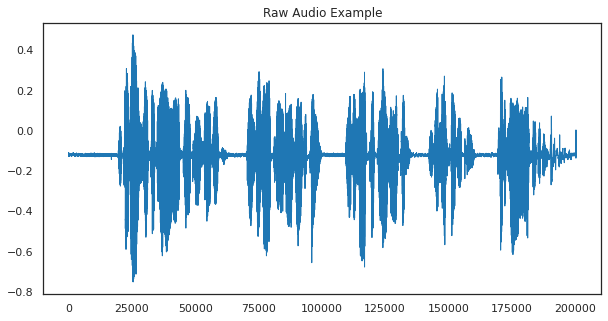

In [58]:
pd.Series(x).plot(figsize=(10,5),
                  lw=1,
                  title='Raw Audio Example',
                  color=color_pal[0])

In [63]:
# x_trimmed, _ = librosa.effects.trim(x, top_db=10)
# pd.Series(x_trimmed).plot(figsize=(10,5),
#                           lw=1,
#                           title='Raw Audio Trimmed Example',
#                           color = color_pal[1])

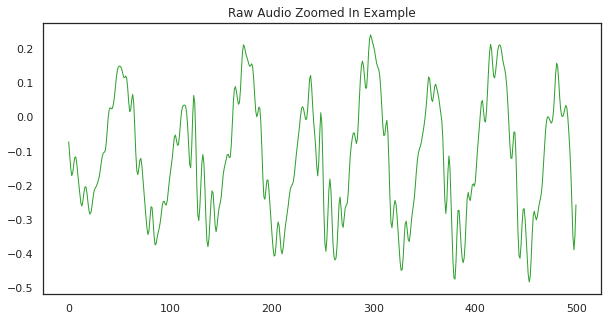

In [65]:
pd.Series(x[30000:30500]).plot(figsize=(10,5),
                               lw=1,
                               title='Raw Audio Zoomed In Example',
                               color = color_pal[2])
plt.show()

# Spectogram

In [67]:
D = librosa.stft(x)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
S_db.shape

(1025, 392)

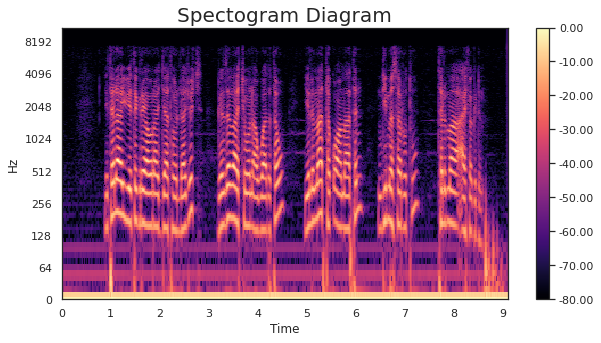

In [69]:
# plot the transformed audio data
fig,ax = plt.subplots(figsize=(10,5))
img = librosa.display.specshow(S_db,
                               x_axis='time',
                               y_axis='log',
                               ax=ax)
ax.set_title('Spectogram Diagram', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()

### Mel spectogram

In [71]:
S = librosa.feature.melspectrogram(x=x,
                                   sr=sr,
                                   n_mels=128)
S_db_mel = librosa.amplitude_to_db(S, ref=np.max)

ParameterError: ignored

In [59]:
# %matplotlib inline
# import librosa.display
# #Plot the signal:
# plt.figure(figsize=(20, 5))
# librosa.display.waveplot(x, sr)

(array([6.90000e+01, 5.82000e+02, 2.64200e+03, 9.32700e+03, 4.01270e+04,
        1.28031e+05, 1.57820e+04, 3.44700e+03, 3.18000e+02, 6.60000e+01]),
 array([-0.7540137 , -0.6312997 , -0.50858563, -0.38587162, -0.26315758,
        -0.14044353, -0.0177295 ,  0.10498454,  0.22769858,  0.3504126 ,
         0.47312665], dtype=float32),
 <a list of 10 Patch objects>)

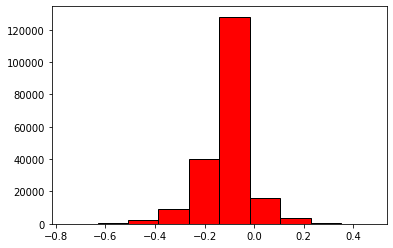

In [ ]:
plt.hist(x, color='red', edgecolor='black')

In [ ]:
def tran_loader(filename):
  name_to_text = {}
  with open (filename, encoding="utf-8")as f:
    f.readline()
    for line in f:
      name=line.split("</s>")[1]
      name=name.replace('(', '')
      name=name.replace(')', '')
      name=name.replace('\n','')
      name=name.replace(' ','')
      text=line.split("</s>")[0]
      text=text.replace("<s>","")
      name_to_text[name]=text
    return name_to_text

In [ ]:
transcription=tran_loader("/content/drive/MyDrive/speech-data/Swahili/AMHARIC/data/train/trsTrain.txt")

In [ ]:
transcription

{'tr_2_tr01002': ' የተ ለቀቁት ምርኮኞች በ አካባቢያቸው ሰላማዊ ኑሮ እንዲ ኖሩ የ ትራንስፖርት ና መጓጓዣ ገንዘብ ተሰጥቷ ቸው መሸኘታቸው ን አመልክቶ በ የ ዞ ናቸው እንደ ደረሱ መቃቋሚያ እንደሚ ሰጣቸው ም አስ ታውቋል ',
 'tr_3_tr01003': ' በ አዲስ አበባው ስታዲየም በ ተካሄዱ ት ሁለት ግጥሚያ ዎች በ መጀመሪያ የ ተገናኙ ት መድን ና ሙገር ሲሚንቶ ሲ ሆኑ በ ውጤቱ ም ሶስት ለ ሶስት ተለያይ ተዋል ',
 'tr_4_tr01004': ' ወሬው ን ወሬ ያደረጉ ምስጢረ ኞች ናቸው ',
 'tr_5_tr01005': ' ኢትዮጵያዊ ቷ በ ብሄራዊ ባህላዊ አለባበስ ከ አለም አንደኝነት ን ተቀዳጀ ች ',
 'tr_6_tr01006': ' ከ ትምክህት እንዳይ ቆጠር ብን እንጂ በ አለም ታሪክ ውስጥ በ ነጮች ያል ተረገጠ ች አገር ኢትዮጵያ ና ት ',
 'tr_7_tr01007': ' እህቶቹ የኤርትራ ዜጐች ና የ ሻእቢያ ደጋፊዎች ናቸው ',
 'tr_8_tr01008': ' እናንተ ም መቀበሪያ እንዳ ታጡ ተጠንቀቁ ',
 'tr_9_tr01009': ' አንቶኔሊ በ አጼ ምንሊክ ፊት የ ፈጸመው ድፍረት በ ኢጣሊያ ን ምክር ቤት አስተ ቸው ',
 'tr_10_tr01010': ' ግን ወደ ኋላው ላይ ኢሳያስ እንደ ልማ ዳቸው ሁሉን ም የ መልከ ፍ ዲፕሎማሲ ያቸው እስራኤል ንም ያስ ወር ፋቸው ጀመር ',
 'tr_11_tr01011': ' ከ የ አቅጣጫ ው እየ ደረሷቸው ያሉ መረጃዎች አሳሳቢ ችግሮች እየ ደረሱ መሆናቸው ን የሚ ጠቁሙ መሆናቸው ን ፕሬዝዳንቱ ተናግረ ዋል ',
 'tr_12_tr01012': ' ከ ማወቁ በፊት እንደ ተበጠበጠ ገበያ እንዳይ በታተን ይህ ነው አጀንዳ ችን ሌላ አጀንዳ የ ለ ንም ',
 'tr_13_tr01013': ' ኢትዮጵያ ም ሰራዊቷ በ ኤርትራ እንደሚ 

In [ ]:
def meta_data(trans, path ):
  target=[]
  features=[]
  filenames=[]
  duration_of_recordings=[]
  for k in trans:
    filename=path+k +".wav"
    filenames.append(filename)
    audio, fs = librosa.load(filename, sr=None)
    duration_of_recordings.append(float(len(audio)/fs))
   
    lable = trans[k]
    target.append(lable)
  return filenames, target,duration_of_recordings


In [ ]:
filenames, target,duration_of_recordings= meta_data(transcription,'valid/')

FileNotFoundError: ignored